In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def gaussian_search(func, mean=0.0, std=5.0, sample_num=100):
    samples = np.random.normal(loc=mean, scale=std, size=(sample_num, 1)) #(based on previous mean)
    min_value = 1e9
    ans = (min_value, 0)
    for sample in samples:
        output = func(sample)
        if output < min_value:
            min_value = output
            ans = (min_value, sample)
            
    return ans

In [3]:
def sim_anneal(func, mean=0.0, std=1.0, T=1,min_T = 0.05, sample_num=100):
    def anneal(func, x1, x2, std, T):
        q1 = np.random.normal(loc=x1, scale=std, size=1)
        q2 = np.random.normal(loc=x2, scale=std, size=1)
        
        prob = (np.exp(-func(x1)/T)*q1)/(np.exp(-func(x2)/T)*q2)
        
        return min(1, prob)
    
    step_size = (T-min_T)/sample_num
    
    for i in range(sample_num):
        x = np.random.normal(loc=mean, scale=std, size=1)
        acceptance_prob = anneal(func, x, mean, std, T)
        if np.random.random() < acceptance_prob:
            mean = x
            
        T -= step_size
        
    return (func(mean), mean)

In [4]:
def function(x):
    return min(1/20*(x+3)**4+0.1*(1/np.exp(-x)) + 3/((x-3.3)**2+0.1) - 2./(abs(x+1.6)+0.1)-2/(abs(x-1.2)+0.1) ,5)

In [5]:
def plot(function, min_value, max_value, bin=100):
    sp = (max_value-min_value)/bin
    X = [min_value + i*sp for i in range(bin+1)]
    Y = []
    for x in X:
        Y.append(function(x))
        
    plt.plot(X, Y)

In [6]:
def trial(function, bo_optimizer, trial_num = 20):
    mean=10
    for i in range(trial_num):
        ans = bo_optimizer(function, mean=mean)
        mean = ans[1]
        
    return ans

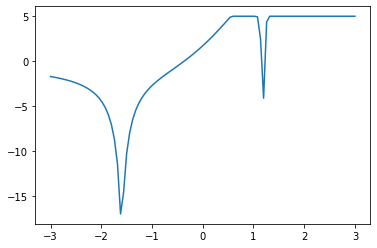

In [7]:
plot(function, -3, 3)

In [8]:
print("Gaussian search")
(val, point) = trial(function, gaussian_search)
print("min f(x) = {}, x = {}\n".format(val, point))

print("Simulated annealing")
(val, point) = sim_anneal(function,sample_num=2000) #same time in gaussian search in total (in gaussian, 100x20 points are sampled)
print("min f(x) = {}, x = {}\n".format(val, point))

Gaussian search
min f(x) = [-15.48530489], x = [-1.56794445]

Simulated annealing
min f(x) = [-19.91990472], x = [-1.60221759]

